In [27]:
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt 
from importlib import reload

from cv_paper_plots import hierarchy

In [132]:
reload(hierarchy)
folder = os.path.join(os.environ['HOME'], 'plots/model/data')
single_file = ['ec2_ec2_hg_a_model_output.pkl']
files = ['ec2_ec2_hg_a_corr_y_hat.npz',
         'ec9_ec9_hg_a_corr_y_hat.npz',
         'gp31_gp31_hg_a_corr_y_hat.npz',
         'gp33_gp33_hg_a_corr_y_hat.npz']

yhs, cv_accuracy, cvs = hierarchy.load_predictions(folder, single_file)
dp, dm, dv, dmjar = hierarchy.load_correlations(folder, files)

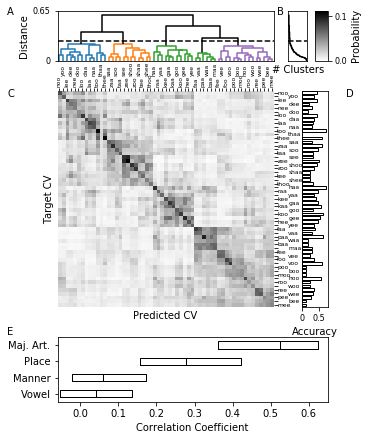

In [156]:
plt.close()
reload(hierarchy)

top_edge = .02
bot_edge = .075
l_edge = .15
r_edge = .1

h_gap = .08
h_gap_tr = .04
v_gap = .07
v_gap_tr = v_gap
small_h_gap = .02

width_cm = .6
bot_height = .15
bot_width = 1. - l_edge - r_edge

threshold = .26
max_d = .65

figsize = (5, 6)
f = plt.figure(figsize=figsize)

height_d = 1 - bot_edge - bot_height - v_gap - height - v_gap - top_edge
ax0 = f.add_axes([l_edge, bot_edge + bot_height + v_gap + height + v_gap, width_cm, height_d])

width = 1 - l_edge - width_cm - h_gap_tr - r_edge

first_width = .6 * (width - small_h_gap)
height_d = 1 - bot_edge - bot_height - v_gap - height - v_gap_tr - top_edge
ax1 = f.add_axes([l_edge + width_cm + h_gap_tr,  bot_edge + bot_height + v_gap + height + v_gap_tr,
                      first_width, height_d])

second_width = (width - small_h_gap) - first_width
cax = f.add_axes([l_edge + width_cm + h_gap_tr + first_width + small_h_gap,
                  bot_edge + bot_height + v_gap + height + v_gap_tr,
                      second_width, height_d])

height = width_cm * figsize[0] / float(figsize[1])
ax2 = f.add_axes([l_edge, bot_edge + bot_height + v_gap, width_cm, height])

width = 1 - l_edge - width_cm - h_gap - r_edge
ax3 = f.add_axes([l_edge + width_cm + h_gap, bot_edge + bot_height + v_gap, width, height])

ax4 = f.add_axes([l_edge, bot_edge, bot_width, bot_height])

z, r = hierarchy.plot_dendrogram(yhs, threshold, cvs, max_d, ax0)
hierarchy.plot_distance_vs_clusters(z, threshold, max_d, ax1)
hierarchy.plot_soft_confusion(yhs, r, f, ax2, cax)
hierarchy.plot_cv_accuracy(cv_accuracy, ax3)
hierarchy.plot_correlations(dp, dm, dv, dmjar, ax4)

f.text(.01, .97, 'A', fontsize=10)
f.text(.76, .97, 'B', fontsize=10)
f.text(.01, .78, 'C', fontsize=10)
f.text(.95, .78, 'D', fontsize=10)
f.text(.01, .23, 'E', fontsize=10)
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/hierarchy.pdf'))
plt.show()